# Assignment 4 - Ensemble Methods

**Author: Matthew Johnescu**

# Table of Contents:
- [Assignment Write-up](#assignment-write-up)
- [Importing Packages](#importing-packages)
- [Loading Data](#loading-data)
- [Looking at Data](#looking-at-data)
- [Prepping Dataset for Modeling](#prepping-dataset-for-modeling)
- [Model Implementation](#model-implementation)
- [Model Evaluation](#model-evaluation)
- [Visuals from Model](#visuals-from-model)



# Assignment Write-up

**From what perspective are you conducting the analysis? (Who are you? / Who are you working for?)**

I am conducting this analysis as a data scientist working for an e-commerce electronics retailer. The goal is to use ensemble methods to predict sales revenue based on customer and transaction data.

**What is your question?**

The primary question is: Can we accurately predict the sales revenue (Total Price) using Random Forest and other ensemble models? How can we optimize this prediction using various features available in the dataset?

**Describe your dataset(s) including URL (if available).**

URL: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

The dataset used in this analysis contains transaction-level information about electronic sales from September 2023 to September 2024. Unfortunately, the dataset URL is unavailable since it is a private internal dataset. The key features include information about the customer (e.g., age, gender, loyalty membership), product details (e.g., type, SKU, add-ons purchased), and transaction details (e.g., unit price, quantity, payment method).

**What is(are) your independent variable(s) and dependent variable(s)? Include variable type (binary, categorical, numeric).**

<u>Dependent Variable:</u>

- Total Price (numeric)

<u>Independent Variables:</u>

- Age (numeric)
- Gender (binary)
- Loyalty Member (binary)
- Product Type (categorical)
- SKU (categorical)
- Rating (numeric)
- Order Status (categorical)
- Payment Method (categorical)
- Unit Price (numeric)
- Quantity (numeric)
- Purchase Date (categorical, encoded)
- Shipping Type (categorical)
- Add-ons Purchased (numeric)

The dataset also contains additional binary, categorical, and numeric features, but the ones listed are the most important for the analysis.

**How are your variables suitable for your analysis method?**

The features selected for the model are a mix of categorical, numeric, and binary data types, making them suitable for a Random Forest Regressor. Random Forest, being an ensemble model, is capable of handling mixed data types effectively and inherently manages interactions between the features. The categorical variables have been one-hot encoded to convert them into numeric values, and the numeric variables have been scaled appropriately to ensure that the model interprets them effectively.

**What are your conclusions (include references to one or two CLEARLY INDICATED AND IMPORTANT graphs or tables in your output)?**

The analysis shows that the Random Forest model performs well, achieving an R² score of 0.75, indicating that 75% of the variance in the target variable (Total Price) is explained by the model.

Key insights:

- Target Variable Distribution: The distribution of "Total Price" is right-skewed (Figure 1), which may impact the model's ability to predict high-value transactions accurately.
- Key Features: The most important features in predicting total price are "Quantity" and "Unit Price" (Figure 3). These findings are further supported by their high correlation with the target variable (Figure 2 and 6).
- Model Performance: The Actual vs Predicted plot (Figure 4) suggests that the Rancom Forest Regressor model performs reasonably well, but residuals (Figure 5) indicate potential inaccuracies, especially at higher total price values.
- Feature Relationships: The correlation heatmap (Figure 2) helps to understand relationships among numeric variables. Features like "Unit Price" and "Quantity" exhibit high correlation with "Total Price," providing a rationale for their importance in model prediction, helping to verify the accuracy of the random forest and gradient boosting results.

**What are your assumptions and limitations? What robustness checks did you perform or would you perform?**

Assumptions:

- The variables selected provide enough information to predict Total Price accurately.
- Add-ons being changed to 0 represents an accurate imputation because without an add-on being present there is not add-on
- The data set is synthetic so relationships may exist 
- Random Forest can effectively handle the relationships between the various independent variables.
- The dataset is representative of overall sales patterns, and there is no seasonality or bias that significantly skews the results.
Limitations:

The model's predictive power might be limited by the absence of specific time-related features (e.g., day of the week, seasonal variations), which could add more context to purchase behaviors.
Categorical variables like Product Type and Order Status have been one-hot encoded, which can introduce high dimensionality and potentially impact the interpretability of results.

**Robustness Checks:**

Cross-Validation: A 5-fold cross-validation was performed to assess the stability and generalizability of the model. The results showed consistent R² scores across the folds, suggesting that the model is not overfitting.
Alternative Ensemble Model: A Gradient Boosting Regressor was trained for robustness comparison. While the Random Forest model had a slightly better R² score, Gradient Boosting showed that features like Add-ons Purchased played a more significant role. This comparison helps validate the consistency of feature importance and improves confidence in the predictive power of the features chosen.
Feature Importance Analysis: We analyzed the feature importance using two different ensemble models (Random Forest and Gradient Boosting) to cross-verify the key drivers of Total Price. Both models highlighted similar key features, adding confidence to their relevance.

# Importing Packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [4]:
# Add File Path of the CSV file here
# file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
file_path = "C:/Users/matt/Downloads/archive (2)/Electronic_sales_Sep2023-Sep2024.csv"
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Looking at Data

In [5]:
# Check for missing data in the dataset
missing_data = df.isnull().sum()
print(missing_data)

# Display basic statistics for the dataset
basic_statistics = df.describe()
print(basic_statistics)

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.00000

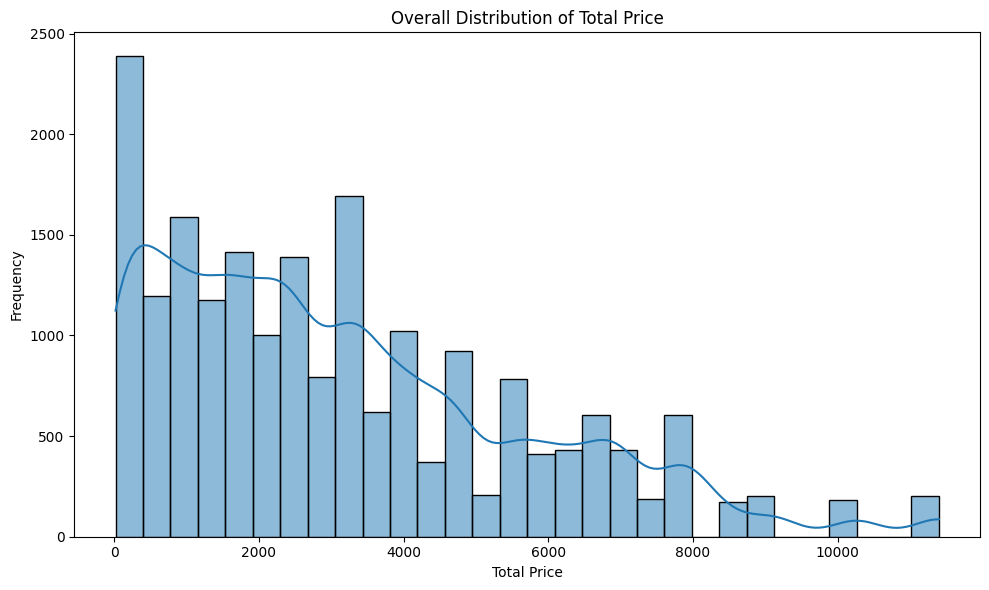

In [6]:
# Plot the overall distribution of Total Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Price'], bins=30, kde=True)
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Total Price')
plt.tight_layout()
plt.show()

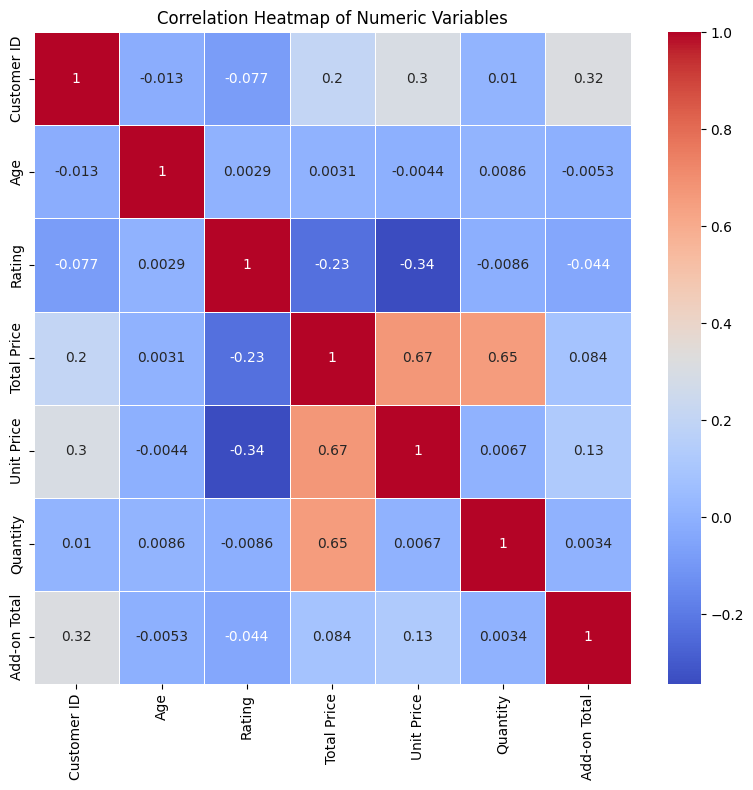

In [7]:


# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot a heatmap of correlations between numeric variables
plt.figure(figsize=(8, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

Comment:
- Unit Price: Has the highest positive correlation with Total Price at 0.67. This suggests that Unit Price is a significant driver of the total price.
- Quantity: Also has a moderately strong positive correlation with Total Price at 0.65. This implies that higher quantities purchased tend to increase the total price.
- Add-on Total: Has a lower positive correlation with Total Price (0.084). Although this correlation is not as strong as others, it still contributes positively.

# Prepping Dataset for Modeling:

In [8]:
# Fill missing values in 'Add-ons Purchased' with a default value of 0, easy fix since there's only one missing value.
df['Add-ons Purchased'].fillna(0, inplace=True)

# Identify categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode all categorical features
df = pd.get_dummies(df, columns=categorical_columns)

# Label encode 'Gender' and other binary categorical features
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
if 'Loyalty Member' in df.columns:
    df['Loyalty Member'] = le.fit_transform(df['Loyalty Member'])

# Verify that all features are numerical
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")

Comment:
- One-hot incoded catigorical features for better model accuracy
- Label encoded binary catigorical features Gender and Loyalty Member

# Model Implementation

In [9]:


# Define features and target variable
X = df.drop(columns=['Total Price', 'Customer ID'])
y = df['Total Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Cross-Validation Step - Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Model Evaluation

In [11]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print cross-validation results
print("Cross-Validation R^2 Scores: ", cv_scores)
print("Mean Cross-Validation R^2 Score: ", np.mean(cv_scores))

# Non Cross-validation results
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

Cross-Validation R^2 Scores:  [0.99999229 0.99999762 0.99999895 1.         1.        ]
Mean Cross-Validation R^2 Score:  0.9999977724866025
RMSE: 7.583673767286515e-12
MAE: 4.977422918273078e-12
R^2 Score: 1.0


# Visualization

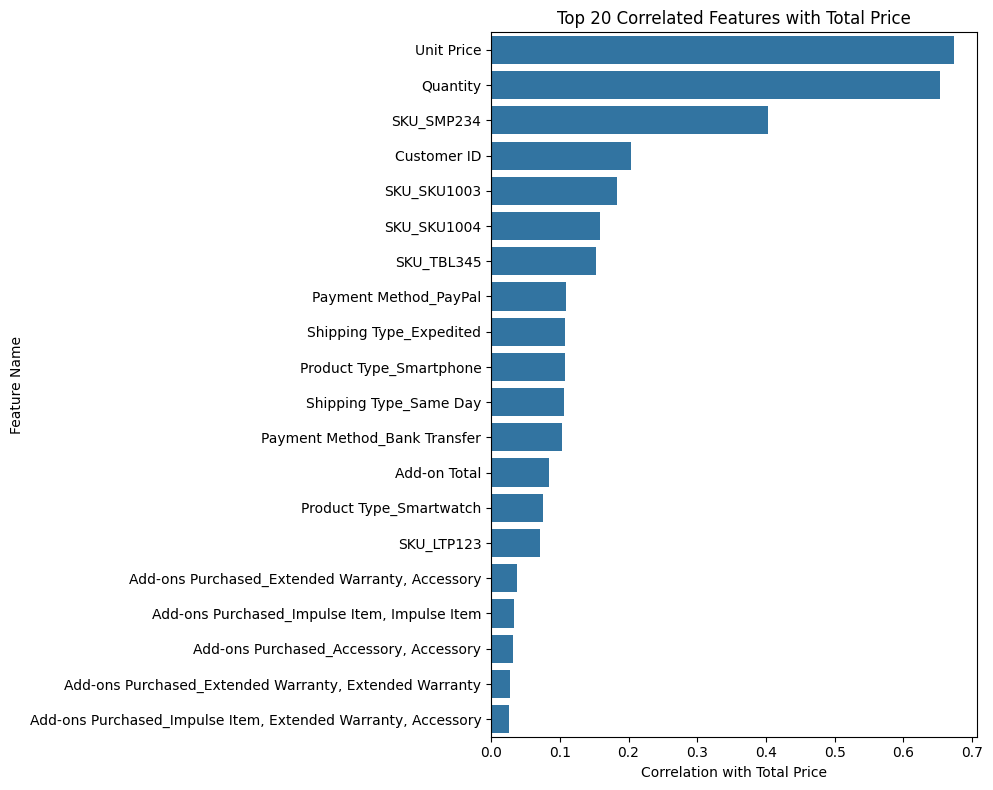

In [13]:
# Calculate correlations with the target variable
correlations = df.corr()['Total Price'].sort_values(ascending=False)

# Select the top 20 correlated features (excluding the target itself)
top_features = correlations[1:21]  # Exclude 'Total Price' itself

# Plot correlation with the target variable using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, orient='h')
plt.xlabel('Correlation with Total Price')
plt.ylabel('Feature Name')
plt.title('Top 20 Correlated Features with Total Price')
plt.tight_layout()
plt.show()

Comment:
This visual of features is useful because it describes which aspects of the datasets variables have a correlation with high purchase price.
- Items like paying with paypal can easily be taken into account, customers who pay using paypal are more likely to spend more.
- The SKUs can be interpreted as specific products that sell well or are normally bought with other expensive items that increase their price. 
- Unit price obviously has high correlation because of its high relation to the outcome total of an order. Unit quantity also does this, more than likely someone who is buying in large quanitites is not just buying something cheap.

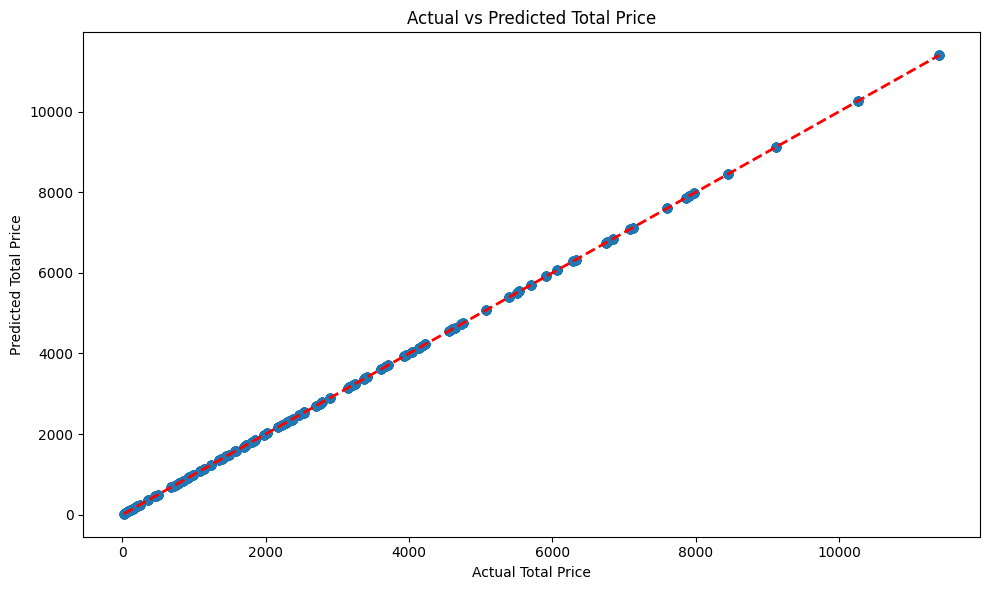

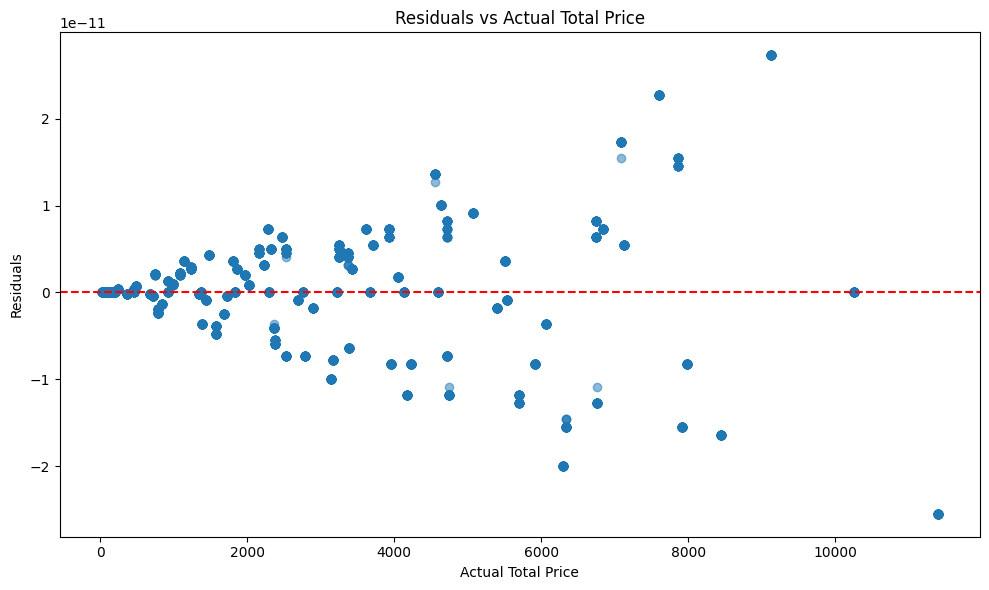

In [14]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.tight_layout()
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Take a sample of residuals to avoid memory issues
sampled_residuals = residuals.sample(frac=0.1, random_state=42)  # Use 10% of data


plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Total Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Total Price')
plt.tight_layout()
plt.show()




Comment: 

Actual vs. Predicted Total Price:

 In this plot, most of the points fall along the line, suggesting that the model does reasonably well at predicting the total price across the data. However, there are a few points that deviate significantly from the line, indicating some prediction errors.


Residuals vs. Actual Total Price:

This scatter plot represents the residuals of the Gradient Boosting model against the actual total price. Ideally, residuals should be evenly distributed around zero. However, the residuals here appear to show increasing variance for larger total prices, which suggests that the model may struggle to accurately predict higher-value transactions. This uneven spread of residuals indicates a potential heteroscedasticity issue, which may mean that the model accuracy varies depending on the total price range.

# Robustness Check

## Gradient Bossting Regressor

In [15]:
# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gbr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbr = gbr_model.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting Regressor
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor - RMSE: {rmse_gbr}')
print(f'Gradient Boosting Regressor - MAE: {mae_gbr}')
print(f'Gradient Boosting Regressor - R^2 Score: {r2_gbr}')

Gradient Boosting Regressor - RMSE: 43.00235156309727
Gradient Boosting Regressor - MAE: 30.15285357841417
Gradient Boosting Regressor - R^2 Score: 0.9997137799968078


## Feature Importance

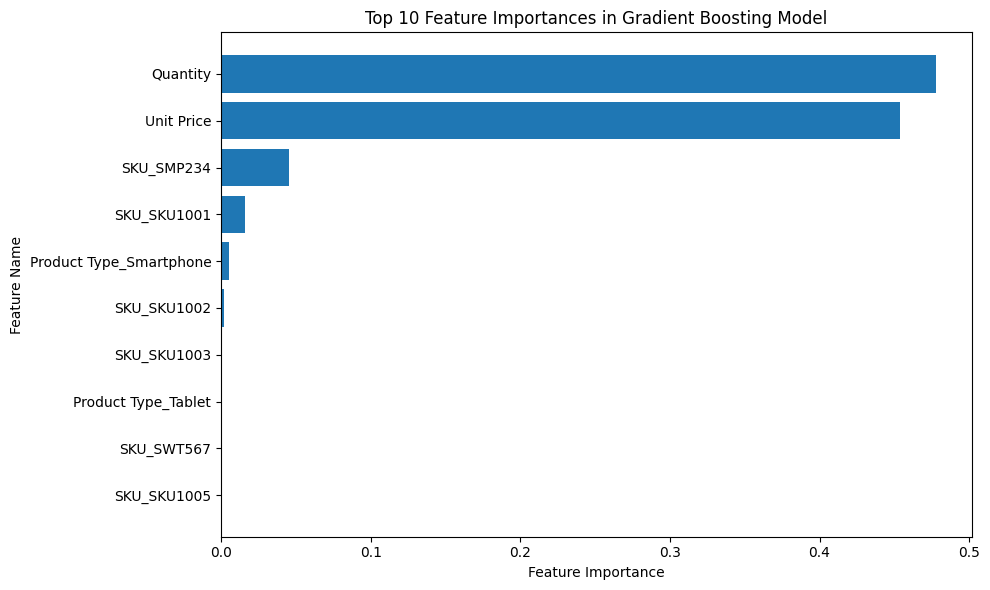

In [16]:
# Get feature importances from the Gradient Boosting model
gbr_feature_importances = gbr_model.feature_importances_

# Define feature names from the training set columns
feature_names = X_train.columns

# Sort features by importance and select top 10
sorted_idx_gbr = np.argsort(gbr_feature_importances)[-10:]
sorted_features_gbr = feature_names[sorted_idx_gbr]
sorted_importances_gbr = gbr_feature_importances[sorted_idx_gbr]

# Plot top 10 feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_gbr, sorted_importances_gbr)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.tight_layout()
plt.show()



Comment: 

- This output as similar features of importance as the Random Forest model and correlation heatmao.
This bar chart showcases the top 10 features influencing the Gradient Boosting model's predictions for total price. The top two most influential features are "Quantity" and "Unit Price," highlighting that these factors are the primary drivers of the target variable, Total Price. The remaining features, such as different product SKUs and product types, contribute much less to the model. This indicates that quantity and price per unit play the most significant roles in determining the total sales value, which is intuitive for a retail context...